Name: Muhamad Nazren Nazmi Bin Muhamad Rusli

Matric no: 1718151

In [ ]:
import numpy as np
from multiprocessing import Process, Pipe
import os
import threading
import time
import matplotlib.pyplot as plt

In [ ]:
def eq_piecewise(packet):
    xls, yls, subpipe= packet
    func = 3 * xls**2 * yls**2 - xls * yls + 1
    pid = os.getpid()
    tid = threading.get_ident()
    print("pid = ", pid)
    print("time = ", time.time())
    subpipe.send(func)

def calc_area(packet):
    zls, subpipe= packet
    regionzero = 0
    regionone = 0

    for i in range(100):
        for j in range(100):
            if zls[i][j] > np.pi:
                zls[i][j] = 1

            else:
                zls[i][j] = 0


    for i in range(100):
        for j in range(100):

            if zls[i][j] == 0:
                regionzero += 1

            else:
                regionone += 1

    ratio = (regionone / (regionone + regionzero))
    totalarea = 10 * 10
    whitezone = totalarea * ratio

    pid = os.getpid()
    tid = threading.get_ident()
    print("pid = ", pid)
    print("time = ", time.time())

    subpipe.send(whitezone)


if __name__ == '__main__':

    eq_mainpipe, eq_subpipe = Pipe()
    area_mainpipe, area_subpipe = Pipe()

    xls = np.linspace(-5, 5, 100)
    yls = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x, y)

    eq_packet = (X, Y, eq_subpipe)
    eq_process = Process(target=eq_piecewise, args=(eq_packet,))

    eq_process.start()
    Z = eq_mainpipe.recv()
    eq_process.join()

    area_packet = (Z, area_subpipe)
    area_process = Process(target=calc_area, args=(area_packet,))

    area_process.start()
    white_area = area_mainpipe.recv()
    area_process.join()

    print("Total area = 100")
    print("Approximate area of white region = ", white_area)

pid =  983
time =  1622215919.3899379
pid =  988
time =  1622215919.4279134
Total area = 100
Approximate area of white region =  85.39999999999999


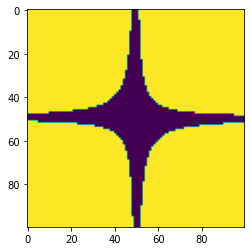

In [ ]:
for i in range(len(xls)):
  for j in range(len(yls)):

    if Z[i][j] > np.pi:
      Z[i][j] = 1

    else:
      Z[i][j] = 0

plt.imshow(Z)